# Mini Project III: Banking Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go

%matplotlib inline
warnings.filterwarnings('ignore')

In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Account Clustering

## 1.1 Exploratory Data Analysis and Data Cleaning

### 1.1.1 Savings Account

In [3]:
twm_savings_account = pd.read_csv('datasets/twm_savings_acct.csv', sep=";")

In [4]:
twm_savings_account.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [5]:
twm_savings_account = twm_savings_account[['cust_id', 'account_active', 'starting_balance', 'ending_balance']]

In [6]:
twm_savings_account.head()

,cust_id,account_active,starting_balance,ending_balance
0,1363160,Y,113.04,122.54
1,1362487,N,651.73,12.89
2,1362548,Y,250.24,254.02
3,1362752,Y,600.26,609.33
4,1363017,N,2011.02,2901.35


In [7]:
twm_savings_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   account_active    421 non-null    object 
 2   starting_balance  421 non-null    float64
 3   ending_balance    421 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.3+ KB


In [8]:
twm_savings_account.describe()

,cust_id,starting_balance,ending_balance
count,4.210000e+02,421.000000,421.000000
mean,1.362987e+06,874.060950,1258.060736
std,2.951807e+02,1704.224338,2054.680311
min,1.362480e+06,100.240000,2.740000
25%,1.362722e+06,180.220000,254.020000
50%,1.362980e+06,310.620000,619.050000
75%,1.363253e+06,742.280000,1535.830000
max,1.363495e+06,17303.420000,22432.780000


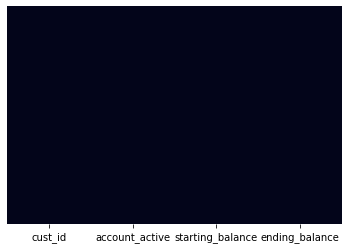

In [9]:
sns.heatmap(twm_savings_account.isnull(), yticklabels=False, cbar=False)
plt.show()

In [10]:
account_dict = {"N": 0, "Y": 1}
twm_savings_account['account_active'] = twm_savings_account['account_active'].apply(lambda x: x.strip()).map(account_dict)
twm_savings_account['amount_saved'] = twm_savings_account['ending_balance'] - twm_savings_account['starting_balance']

In [11]:
twm_savings_account = twm_savings_account[['cust_id', 'account_active', 'amount_saved']]
twm_savings_account.columns = ['cust_id', 'have_savings', 'amount_saved']
twm_savings_account.head()

,cust_id,have_savings,amount_saved
0,1363160,1,9.50
1,1362487,0,-638.84
2,1362548,1,3.78
3,1362752,1,9.07
4,1363017,0,890.33


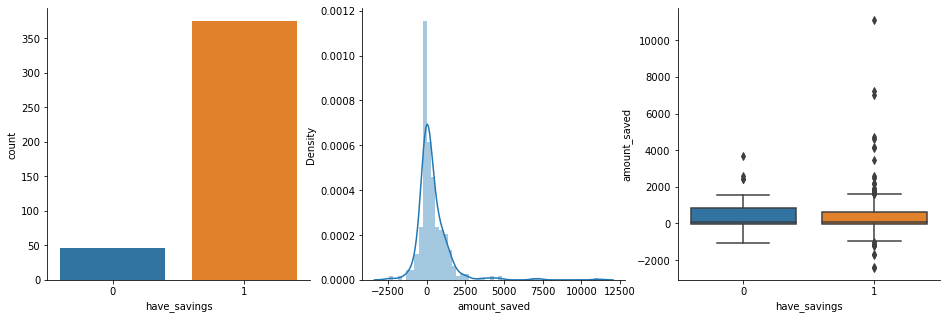

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.countplot(x='have_savings', data = twm_savings_account, ax=ax[0])
sns.distplot(twm_savings_account['amount_saved'], ax=ax[1])
sns.boxplot(x=twm_savings_account['have_savings'], y=twm_savings_account['amount_saved'], ax=ax[2])
sns.despine()
plt.show()

### 1.1.2 Credit Account

In [26]:
twm_credit_account = pd.read_csv('datasets/twm_credit_acct.csv', sep=";")

In [27]:
twm_credit_account.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [28]:
twm_credit_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [29]:
twm_credit_account[['credit_limit', 'credit_rating', 'starting_balance', 'ending_balance']].describe()

,credit_limit,credit_rating,starting_balance,ending_balance
count,468.000000,468.000000,468.000000,468.000000
mean,2647.649573,0.316239,1123.257521,1184.885662
std,2293.771202,1.453930,1636.254478,1363.065314
min,1000.000000,0.000000,0.000000,0.000000
25%,1000.000000,0.000000,0.000000,353.187500
50%,1900.000000,0.000000,568.300000,1000.000000
75%,3000.000000,0.000000,1631.635000,1358.717500
max,17300.000000,10.000000,11394.660000,9500.000000


In [30]:
twm_credit_account = twm_credit_account[['cust_id', 'account_active', 'credit_limit', 'starting_balance', 'ending_balance']]

In [31]:
twm_credit_account.head()

,cust_id,account_active,credit_limit,starting_balance,ending_balance
0,1363160,Y,1000,657.46,286.69
1,1362487,Y,3000,0.00,1548.23
2,1362548,Y,6700,6965.25,68.68
3,1362752,N,2400,2302.14,0.00
4,1363017,Y,1000,0.00,1000.00


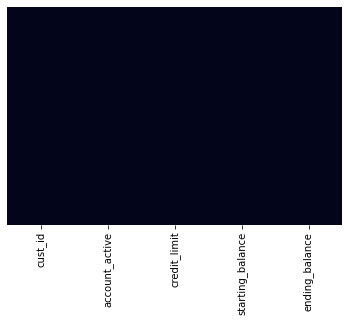

In [32]:
sns.heatmap(twm_credit_account.isnull(), yticklabels=False, cbar=False)
plt.show()

In [33]:
twm_credit_account['debt_amount'] = twm_credit_account['ending_balance'] - twm_credit_account['starting_balance']
twm_credit_account['account_active'] = twm_credit_account['account_active'].apply(lambda x: x.strip()).map(account_dict)

In [34]:
not_pay = twm_credit_account[(twm_credit_account['starting_balance'] == 0) & (twm_credit_account['account_active'] == 1)].count()['cust_id']
not_use = twm_credit_account[(twm_credit_account['ending_balance'] == 0) & (twm_credit_account['account_active'] == 1)].count()['cust_id']
print(f"{not_pay} people did not pay their previous credit balance, therefore have no credit to start with.")
print(f"{not_use} people did not have use their credit card and spend nothing throughout the period of this balance.")

140 people did not pay their previous credit balance, therefore have no credit to start with.
29 people did not have use their credit card and spend nothing throughout the period of this balance.


In [35]:
twm_credit_account = twm_credit_account[['cust_id', 'account_active', 'credit_limit', 'debt_amount']]
twm_credit_account.rename(columns={'account_active': 'has_credit'}, inplace=True)

In [36]:
twm_credit_account.head()

,cust_id,has_credit,credit_limit,debt_amount
0,1363160,1,1000,-370.77
1,1362487,1,3000,1548.23
2,1362548,1,6700,-6896.57
3,1362752,0,2400,-2302.14
4,1363017,1,1000,1000.00


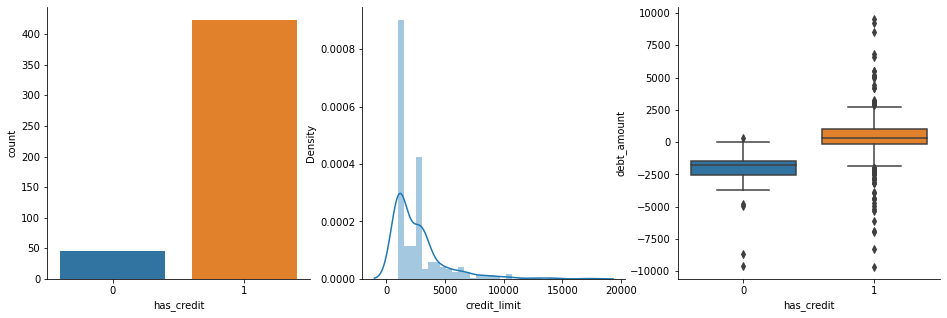

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.countplot(x='has_credit', data = twm_credit_account, ax=ax[0])
sns.distplot(twm_credit_account['credit_limit'], ax=ax[1])
sns.boxplot(x='has_credit', y='debt_amount', data=twm_credit_account, ax=ax[2])
sns.despine()
plt.show()

In [38]:
max_debt = twm_credit_account[twm_credit_account['credit_limit'] == abs(twm_credit_account['debt_amount'])].count()['cust_id']
print(f"There are {max_debt} customers who have debts that reached their credit limit.")

There are 68 customers who have debts that reached their credit limit.


### 1.1.3 Savings Transaction Data

In [39]:
twm_savings_tran = pd.read_csv('datasets/twm_savings_tran.csv', sep=";")

In [40]:
twm_savings_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [41]:
twm_savings_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11189 entries, 0 to 11188
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        11189 non-null  int64  
 1   tran_id        11189 non-null  int64  
 2   tran_amt       11189 non-null  float64
 3   principal_amt  11189 non-null  float64
 4   interest_amt   11189 non-null  float64
 5   new_balance    11189 non-null  float64
 6   tran_date      11189 non-null  object 
 7   tran_time      11189 non-null  object 
 8   channel        11189 non-null  object 
 9   tran_code      11189 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 874.3+ KB


In [42]:
twm_savings_tran[['tran_amt', 'principal_amt', 'interest_amt', 'new_balance']].describe()

,tran_amt,principal_amt,interest_amt,new_balance
count,11189.000000,11189.000000,11189.000000,11189.000000
mean,14.458362,13.628621,0.829741,1229.467968
std,221.971173,222.003741,2.856393,2256.670395
min,-2495.880000,-2495.880000,0.000000,0.070000
25%,-0.750000,-0.750000,0.000000,238.480000
50%,0.390000,0.000000,0.000000,562.040000
75%,7.340000,0.000000,0.480000,1247.300000
max,4478.610000,4478.610000,44.680000,26016.690000


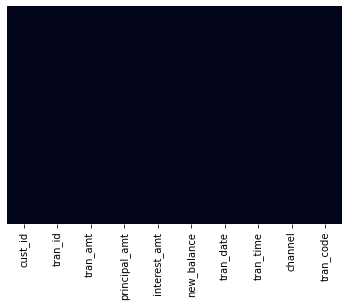

In [43]:
sns.heatmap(twm_savings_tran.isnull(), yticklabels=False, cbar=False)
plt.show()

In [44]:
twm_savings_tran = twm_savings_tran[['cust_id', 'principal_amt', 'tran_amt', 'interest_amt', 'new_balance']]

In [45]:
savings_df = twm_savings_tran.groupby(['cust_id', 'principal_amt',  'interest_amt','tran_amt', 'new_balance']).size().reset_index().drop(0, axis=1)

In [46]:
savings_df.head()

,cust_id,principal_amt,interest_amt,tran_amt,new_balance
0,1362480,-608.16,0.0,-608.16,1186.46
1,1362480,-544.68,0.0,-544.68,841.99
2,1362480,-180.00,0.0,-180.00,1212.27
3,1362480,-100.00,0.0,-100.00,1087.94
4,1362480,0.00,0.0,0.00,707.09


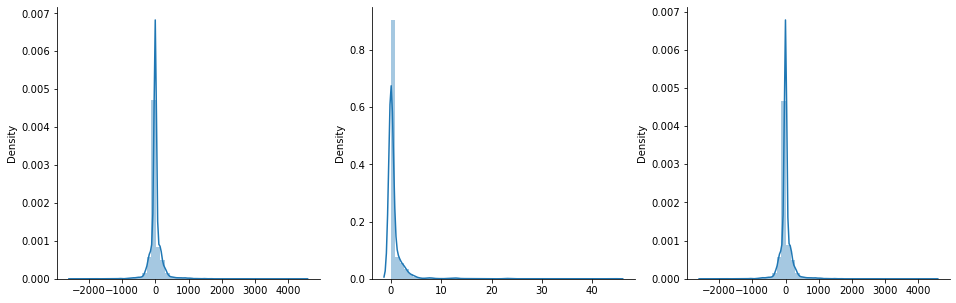

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.distplot(x=savings_df['principal_amt'], ax=ax[0])
sns.distplot(x=savings_df['interest_amt'], ax=ax[1])
sns.distplot(x=savings_df['tran_amt'], ax=ax[2])
sns.despine()
plt.show()

In [48]:
savings_df = savings_df[['cust_id', 'tran_amt']]
savings_df.columns = ['cust_id', 'savings_tran_amt']
savings_df.head()

,cust_id,savings_tran_amt
0,1362480,-608.16
1,1362480,-544.68
2,1362480,-180.00
3,1362480,-100.00
4,1362480,0.00


In [50]:
savings_to_merge = savings_df.groupby('cust_id').sum().reset_index()
savings_to_merge.head()

,cust_id,savings_tran_amt
0,1362480,482.32
1,1362484,1929.66
2,1362486,-168.24
3,1362487,-638.84
4,1362489,-386.59


In [51]:
savings_count = savings_df.groupby('cust_id').count().reset_index()
savings_count.head()

,cust_id,savings_tran_amt
0,1362480,25
1,1362484,33
2,1362486,25
3,1362487,19
4,1362489,22


In [52]:
savings_to_merge = pd.merge(savings_to_merge, savings_count, on='cust_id')
savings_to_merge.columns = ['cust_id', 'savings_tran_amt', 'savings_tran_count']
savings_to_merge.head()

,cust_id,savings_tran_amt,savings_tran_count
0,1362480,482.32,25
1,1362484,1929.66,33
2,1362486,-168.24,25
3,1362487,-638.84,19
4,1362489,-386.59,22


### 1.1.4 Credit Transactions Data

In [69]:
twm_credit_tran = pd.read_csv('datasets/twm_credit_tran.csv', sep=';')
twm_credit_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [70]:
twm_credit_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [71]:
twm_credit_tran[['tran_amt', 'principal_amt', 'interest_amt', 'new_balance']].describe()

,tran_amt,principal_amt,interest_amt,new_balance
count,20167.000000,20167.000000,20167.000000,20167.000000
mean,0.773537,-1.429786,2.208701,-1130.349441
std,455.914969,451.535918,8.135091,1377.689559
min,-1565.500000,-1565.500000,0.000000,-17300.000000
25%,-166.790000,-166.790000,0.000000,-1411.110000
50%,-67.510000,-67.510000,0.000000,-766.210000
75%,0.000000,0.000000,0.000000,-334.290000
max,17464.520000,17300.000000,164.520000,0.000000


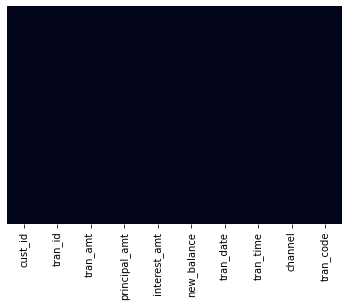

In [72]:
sns.heatmap(twm_credit_tran.isnull(), yticklabels=False, cbar=False)
plt.show()

In [73]:
credit_df = twm_credit_tran.groupby(['cust_id', 'principal_amt',  'interest_amt','tran_amt', 'new_balance']).size().reset_index().drop(0, axis=1)
credit_df.head()

,cust_id,principal_amt,interest_amt,tran_amt,new_balance
0,1362480,-607.82,0.0,-607.82,-2500.00
1,1362480,-225.14,0.0,-225.14,-1892.18
2,1362480,-221.24,0.0,-221.24,-2500.00
3,1362480,-221.12,0.0,-221.12,-2500.00
4,1362480,-200.00,0.0,-200.00,-1667.04


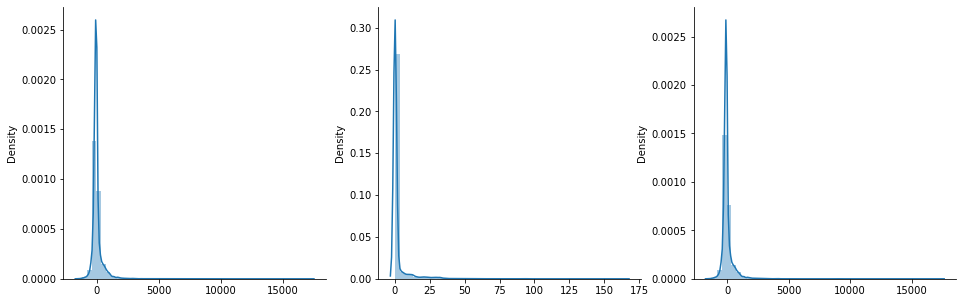

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.distplot(x=credit_df['principal_amt'], ax=ax[0])
sns.distplot(x=credit_df['interest_amt'], ax=ax[1])
sns.distplot(x=credit_df['tran_amt'], ax=ax[2])
sns.despine()
plt.show()

In [75]:
credit_df = credit_df[['cust_id', 'tran_amt']]
credit_df.columns = ['cust_id', 'credit_tran_amt']
credit_df.head()

,cust_id,credit_tran_amt
0,1362480,-607.82
1,1362480,-225.14
2,1362480,-221.24
3,1362480,-221.12
4,1362480,-200.00


In [79]:
credit_to_merge = credit_df.groupby('cust_id').sum().reset_index()
cust_credit = credit_df.groupby('cust_id').count().reset_index()
credit_to_merge = pd.merge(credit_to_merge, cust_credit, on='cust_id')
credit_to_merge.columns = ['cust_id', 'credit_tran_amt', 'credit_tran_count']
credit_to_merge.head()

,cust_id,credit_tran_amt,credit_tran_count
0,1362480,1313.88,20
1,1362484,923.87,54
2,1362485,-761.23,72
3,1362487,-1535.59,32
4,1362489,1694.18,35


### 1.1.5 Merge to a DataFrame

In [190]:
df1 = pd.merge(twm_savings_account, twm_credit_account, on='cust_id', how='left')
df2 = pd.merge(savings_to_merge, credit_to_merge, on='cust_id', how='left')
transaction_df = pd.merge(df1, df2, on='cust_id', how='left')
transaction_df.head()

,cust_id,have_savings,amount_saved,has_credit,credit_limit,debt_amount,savings_tran_amt,savings_tran_count,credit_tran_amt,credit_tran_count
0,1363160,1,9.50,1.0,1000.0,-370.77,9.50,47.0,380.03,68.0
1,1362487,0,-638.84,1.0,3000.0,1548.23,-638.84,19.0,-1535.59,32.0
2,1362548,1,3.78,1.0,6700.0,-6896.57,3.78,12.0,6977.25,22.0
3,1362752,1,9.07,0.0,2400.0,-2302.14,9.07,12.0,2406.65,15.0
4,1363017,0,890.33,1.0,1000.0,1000.00,890.33,23.0,-956.10,63.0


In [191]:
transaction_df.drop('cust_id', axis=1, inplace=True)

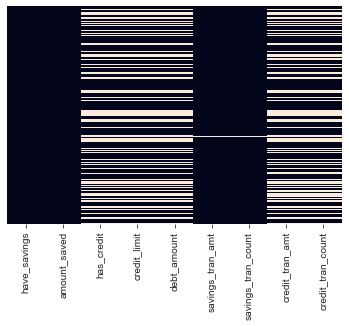

In [192]:
sns.heatmap(transaction_df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [193]:
transaction_df.fillna(0, inplace=True)

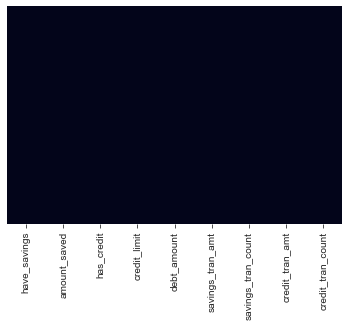

In [194]:
sns.heatmap(transaction_df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [195]:
transaction_df['total_transactions'] = transaction_df['credit_tran_count'] + transaction_df['savings_tran_count']
transaction_df['total_transaction_amount'] = transaction_df['credit_tran_amt'] + transaction_df['savings_tran_amt']
transaction_df['avg_transaction'] = transaction_df['total_transaction_amount']/transaction_df['total_transactions']
transaction_df.drop(['savings_tran_amt', 'savings_tran_count', 'credit_tran_amt', 'credit_tran_count'], axis=1, inplace=True)
transaction_df = transaction_df.fillna(0)

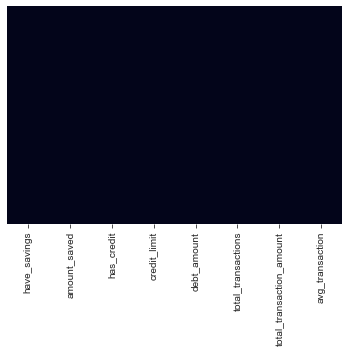

In [196]:
sns.heatmap(transaction_df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [199]:
transaction_df.drop(['have_savings', 'has_credit', 'avg_transaction'], axis=1, inplace=True)

In [222]:
transaction_df_cluster = transaction_df.copy()
transaction_df_cluster['cluster'] = trans_analysis

In [229]:
transaction_df_cluster.groupby('cluster').mean()

,amount_saved,credit_limit,debt_amount,total_transactions,total_transaction_amount
cluster,,,,,
0,420.420676,2537.837838,576.144730,86.385135,-180.445270
1,276.616426,907.228916,33.650884,34.578313,245.770201
2,1273.506667,7758.333333,-3892.270417,64.083333,5355.588750


## 1.2 Cluster Analysis

In [200]:
scaler = MinMaxScaler()
scaler.fit(transaction_df)
transaction_data = scaler.fit_transform(transaction_df)

In [201]:
def plot_distortions(data, max_clusters=10):
    distortions = []
    
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
        
    sns.lineplot(x=range(1, max_clusters+1), y=distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortions')
    sns.despine()
    plt.show()

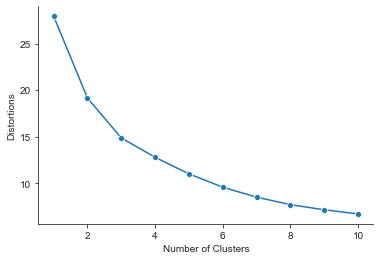

In [202]:
plot_distortions(transaction_data)

In [203]:
transaction_km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
trans_analysis = transaction_km.fit_predict(transaction_data)

In [204]:
transaction_result = pd.DataFrame(transaction_data, columns=list(transaction_df.columns))
transaction_result['cluster'] = trans_analysis
transaction_result.head()

,amount_saved,credit_limit,debt_amount,total_transactions,total_transaction_amount,cluster
0,0.179130,0.057803,0.482040,0.602094,0.317237,0
1,0.131055,0.173410,0.582738,0.267016,0.209980,1
2,0.178706,0.387283,0.139604,0.178010,0.592975,2
3,0.179098,0.138728,0.380693,0.141361,0.401997,1
4,0.244444,0.057803,0.553970,0.450262,0.298190,0


In [210]:
#radar_data = transaction_result.copy().drop(['have_savings', 'has_credit'], axis=1)
radar_data = transaction_result.groupby('cluster').mean()
radar_data.head()

,amount_saved,credit_limit,debt_amount,total_transactions,total_transaction_amount
cluster,,,,,
0,0.209600,0.146696,0.531728,0.452278,0.293393
1,0.198937,0.052441,0.503261,0.181038,0.311223
2,0.272857,0.448459,0.297252,0.335515,0.524979


In [207]:
def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [211]:
plot_radar_chart(radar_data)

## 1.3 PCA Analysis

### 1.3.1 PCA Plot

In [212]:
transaction_pca = PCA(n_components=2)
transaction_components = transaction_pca.fit_transform(transaction_data)

In [213]:
transaction_pca_df = pd.DataFrame(transaction_components, columns=['PC1', 'PC2'])
transaction_pca_df['cluster'] = trans_analysis

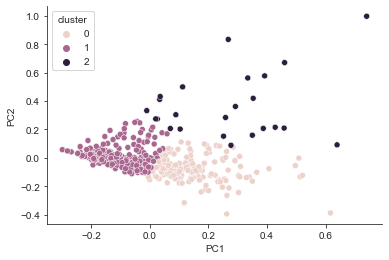

In [214]:
sns.scatterplot(x='PC1', y='PC2', data=transaction_pca_df, hue='cluster')
sns.despine()
plt.show()

### 1.3.2 Scree Plot

In [215]:
scree_pca = PCA()
scree_pca_components = scree_pca.fit_transform(transaction_data)

In [217]:
scree_df = pd.DataFrame({'var': scree_pca.explained_variance_ratio_ * 100, 'PC':[f"PC{i}" for i in range(1, 6)]})
scree_df

,var,PC
0,47.119079,PC1
1,28.327938,PC2
2,15.945399,PC3
3,8.507268,PC4
4,0.100316,PC5


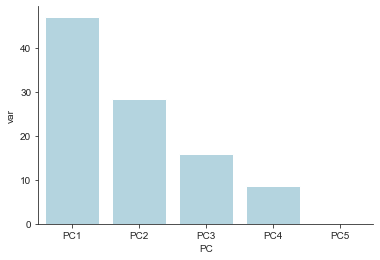

In [218]:
sns.barplot(x='PC', y='var', data=scree_df, color='lightblue')
sns.despine()
plt.show()

### 1.3.3 Loading Plot

In [230]:
transaction_loadings = transaction_pca.components_.T * np.sqrt(transaction_pca.explained_variance_)
transaction_loadings_df = pd.DataFrame(transaction_loadings, columns=['PC1', 'PC2'], index=list(transaction_df.columns))

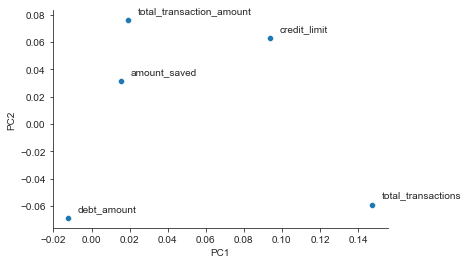

In [236]:
transaction_properties = list(transaction_df.columns)
sns.set_style('ticks')
sns.scatterplot(x='PC1', y='PC2', data=transaction_loadings_df)

for i in range(len(transaction_properties)):
    plt.text(transaction_loadings_df.iloc[i]['PC1']+0.005, transaction_loadings_df.iloc[i]['PC2']+0.005, transaction_properties[i])

sns.despine()
plt.show()

# 2. Demographic and Account Clustering

In [297]:
twm_customers = pd.read_csv('datasets/twm_customer.csv', sep=";")
twm_customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [298]:
twm_customers = twm_customers[['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children']]

In [299]:
transaction_df2 = pd.merge(df1, df2, on='cust_id', how='left')
combined_df = pd.merge(twm_customers, transaction_df2, on='cust_id', how='left')
combined_df.fillna(0, inplace=True)
combined_df.head()

,cust_id,income,age,years_with_bank,nbr_children,have_savings,amount_saved,has_credit,credit_limit,debt_amount,savings_tran_amt,savings_tran_count,credit_tran_amt,credit_tran_count
0,1362691,26150,46,5,1,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0
1,1362487,6605,71,1,0,0.0,-638.84,1.0,3000.0,1548.23,-638.84,19.0,-1535.59,32.0
2,1363160,18548,38,8,0,1.0,9.50,1.0,1000.0,-370.77,9.50,47.0,380.03,68.0
3,1362752,47668,54,3,0,1.0,9.07,0.0,2400.0,-2302.14,9.07,12.0,2406.65,15.0
4,1362548,44554,59,9,2,1.0,3.78,1.0,6700.0,-6896.57,3.78,12.0,6977.25,22.0


In [300]:
demo_account_df = combined_df.copy()
demo_account_df['total_tran_count'] = demo_account_df['savings_tran_count'] + demo_account_df['credit_tran_count']
demo_account_df['total_tran_amount'] = demo_account_df['savings_tran_amt'] + demo_account_df['credit_tran_amt']

In [301]:
demo_account_df.drop(['cust_id','savings_tran_amt', 'credit_tran_amt', 'savings_tran_count', 'credit_tran_count', 'has_credit', 'have_savings', 'total_tran_count', 'years_with_bank'], axis=1, inplace=True)

In [302]:
demo_account_df.head()

,income,age,nbr_children,amount_saved,credit_limit,debt_amount,total_tran_amount
0,26150,46,1,0.00,0.0,0.00,0.00
1,6605,71,0,-638.84,3000.0,1548.23,-2174.43
2,18548,38,0,9.50,1000.0,-370.77,389.53
3,47668,54,0,9.07,2400.0,-2302.14,2415.72
4,44554,59,2,3.78,6700.0,-6896.57,6981.03


## 2.1 Cluster Analysis

In [303]:
scaler = MinMaxScaler()
scaler.fit(demo_account_df)
demo_account_data = scaler.fit_transform(demo_account_df)

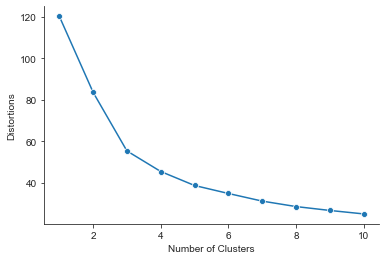

In [304]:
plot_distortions(demo_account_data)

In [305]:
demo_account_km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
demo_account_analysis = demo_account_km.fit_predict(demo_account_data)

In [306]:
demo_account_df = pd.DataFrame(demo_account_data, columns=demo_account_df.columns)
demo_account_df['cluster'] = demo_account_analysis
demo_account_df.head()

,income,age,nbr_children,amount_saved,credit_limit,debt_amount,total_tran_amount,cluster
0,0.181399,0.434211,0.2,0.178426,0.000000,0.501496,0.300942,1
1,0.045818,0.763158,0.0,0.131055,0.173410,0.582738,0.209980,1
2,0.128665,0.328947,0.0,0.179130,0.057803,0.482040,0.317237,0
3,0.330667,0.539474,0.0,0.179098,0.138728,0.380693,0.401997,1
4,0.309066,0.605263,0.4,0.178706,0.387283,0.139604,0.592975,2


In [307]:
demo_account_plot = demo_account_df.groupby('cluster').mean()

In [308]:
plot_radar_chart(demo_account_plot)

## 2.2 PCA Plot

In [309]:
demo_account_pca = PCA(n_components=2)
demo_account_components = demo_account_pca.fit_transform(demo_account_data)

In [310]:
demo_account_pca_df = pd.DataFrame(demo_account_components, columns=['PC1', 'PC2'])
demo_account_pca_df['cluster'] = demo_account_analysis

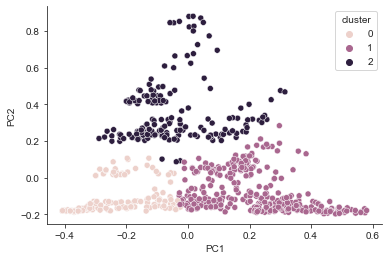

In [311]:
sns.scatterplot(x='PC1', y='PC2', data=demo_account_pca_df, hue='cluster')
sns.despine()
plt.show()

In [312]:
scree_pca = PCA()
scree_pca_components = scree_pca.fit_transform(demo_account_data)

In [314]:
scree_df = pd.DataFrame({'var': scree_pca.explained_variance_ratio_ * 100, 'PC':[f"PC{i}" for i in range(1, 8)]})
scree_df

,var,PC
0,40.753702,PC1
1,32.309878,PC2
2,12.867693,PC3
3,7.421798,PC4
4,4.504117,PC5
5,2.119171,PC6
6,0.023641,PC7


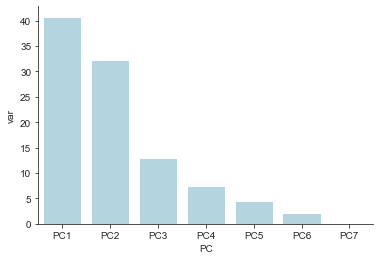

In [315]:
sns.barplot(x='PC', y='var', data=scree_df, color='lightblue')
sns.despine()
plt.show()

In [316]:
demo_account_loadings = demo_account_pca.components_.T * np.sqrt(demo_account_pca.explained_variance_)
demo_account_loadings_df = pd.DataFrame(demo_account_loadings, columns=['PC1', 'PC2'], index=list(demo_account_df.columns)[:-1])

In [317]:
demo_account_loadings_df

,PC1,PC2
income,0.055363,0.074054
age,0.249256,-0.005047
nbr_children,-0.014409,0.215444
amount_saved,0.004049,0.004259
credit_limit,0.018582,0.012248
debt_amount,-0.000366,-0.003586
total_tran_amount,0.002702,0.006039


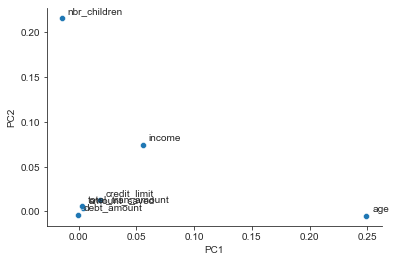

In [318]:
demo_account_properties = list(demo_account_df.columns)[:-1]
sns.set_style('ticks')
sns.scatterplot(x='PC1', y='PC2', data=demo_account_loadings_df)

for i in range(len(demo_account_properties)):
    plt.text(demo_account_loadings_df.iloc[i]['PC1']+0.005, demo_account_loadings_df.iloc[i]['PC2']+0.005, demo_account_properties[i])

sns.despine()
plt.show()